In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
pima = pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\penguins.csv",)
pima.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Gender
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,41.5,20.0,186,3450,NaN
4,Adelie,Torgersen,36.7,19.3,193,3450,female


In [3]:
#for suffle
pima= pima.sample(frac=1, random_state=2).reset_index(drop=True)

print(pima.head())

     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0     Adelie  Biscoe            41.1           19.1                188   
1  Chinstrap   Dream            51.4           19.0                201   
2     Adelie  Biscoe            37.8           18.3                174   
3     Adelie   Dream            43.2           18.5                192   
4     Gentoo  Biscoe            50.5           15.9                225   

   body_mass_g  Gender  
0         4100    male  
1         3950    male  
2         3400  female  
3         4100    male  
4         5400    male  


In [4]:
pima.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Gender
339,Chinstrap,Dream,50.6,19.4,193,3800,male
340,Adelie,Biscoe,35.9,19.2,189,3800,female
341,Adelie,Torgersen,39.6,17.2,196,3550,female
342,Adelie,Torgersen,36.6,17.8,185,3700,female
343,Gentoo,Biscoe,42.0,13.5,210,4150,female


In [5]:
#Manual Mapping (using replace or map methods)# Using replace
pima['gender_numeric_replace'] = pima['Gender'].replace({'male': 0, 'female': 1})

# Using map
pima['gender_numeric_map'] = pima['Gender'].map({'male': 0, 'female': 1})

print(pima)


       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie     Biscoe            41.1           19.1                188   
1    Chinstrap      Dream            51.4           19.0                201   
2       Adelie     Biscoe            37.8           18.3                174   
3       Adelie      Dream            43.2           18.5                192   
4       Gentoo     Biscoe            50.5           15.9                225   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            50.6           19.4                193   
340     Adelie     Biscoe            35.9           19.2                189   
341     Adelie  Torgersen            39.6           17.2                196   
342     Adelie  Torgersen            36.6           17.8                185   
343     Gentoo     Biscoe            42.0           13.5                210   

     body_mass_g  Gender  gender_numeric_replace  g

C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_9208\3373540697.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pima['gender_numeric_replace'] = pima['Gender'].replace({'male': 0, 'female': 1})


In [6]:
#split dataset in features and target variable
feature_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g' ]
X = pima[feature_cols] # Features
y = pima.gender_numeric_map  # Target variable

In [7]:
# If y is a pandas Series or DataFrame
print("Number of NaNs in y:", pd.isna(y).sum())

# Or if y is a numpy array
print("Number of NaNs in y:", np.isnan(y).sum())


Number of NaNs in y: 11
Number of NaNs in y: 11


In [8]:
mask = ~pd.isna(y)
X = X[mask]
y = y[mask]


In [9]:
# If y is a pandas Series or DataFrame
print("Number of NaNs in y:", pd.isna(y).sum())

# Or if y is a numpy array
print("Number of NaNs in y:", np.isnan(y).sum())


Number of NaNs in y: 0
Number of NaNs in y: 0


In [10]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [11]:
print(X_test)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
59             45.2           14.8                212         5200
57             40.5           18.9                180         3950
284            40.2           20.1                200         3975
107            38.8           17.6                191         3275
62             48.1           15.1                209         5500
..              ...            ...                ...          ...
230            53.4           15.8                219         5500
207            45.6           20.3                191         4600
261            51.3           14.2                218         5300
264            40.7           17.0                190         3725
338            42.8           18.5                195         4250

[84 rows x 4 columns]


In [12]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear', random_state=0)

In [13]:
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[38,  3],
       [11, 32]], dtype=int64)

([<matplotlib.axis.YTick at 0x150e6d17410>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

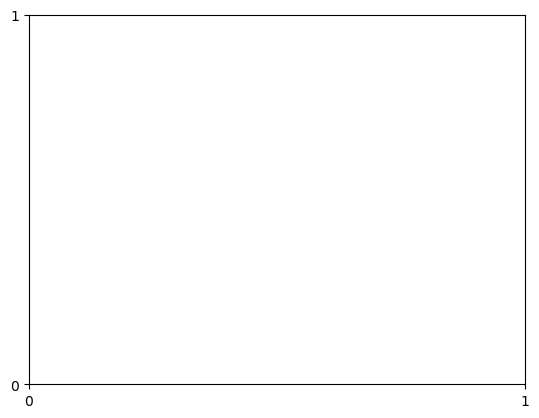

In [14]:
#Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

<Axes: >

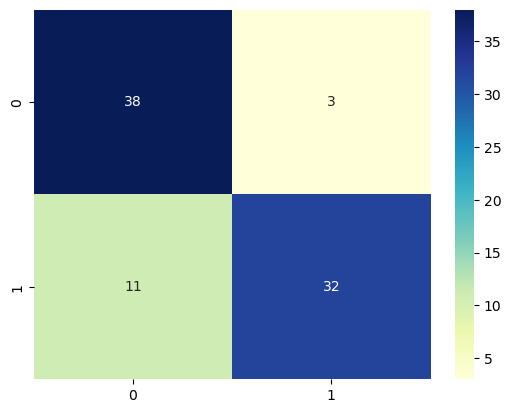

In [15]:
# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

<Axes: >

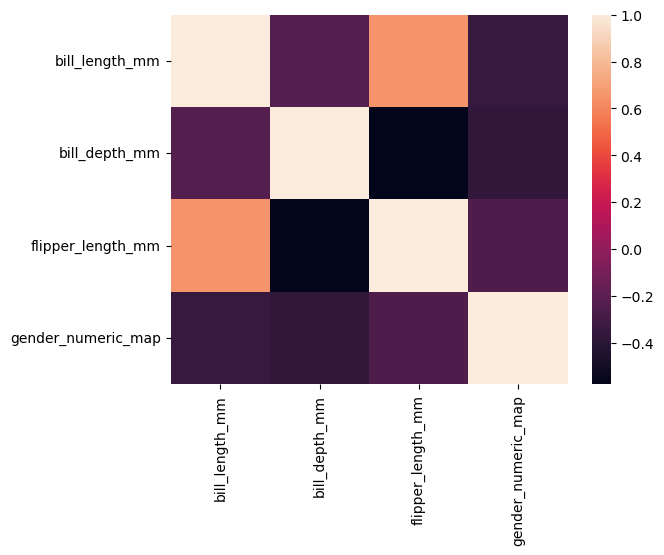

In [36]:
 sns.heatmap(pima.corr()) #generating the heat map of the feature

In [16]:
ax.xaxis.set_label_position("top")
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

Accuracy: 0.8333333333333334
Precision: 0.9142857142857143
Recall: 0.7441860465116279


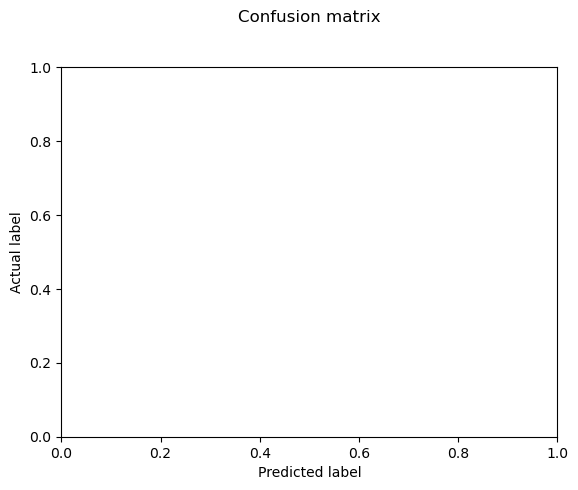

In [17]:
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

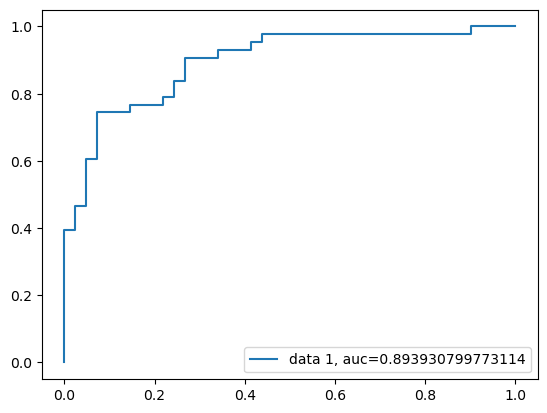

In [18]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [19]:
import seaborn as sb
import sklearn

In [20]:
pima.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Gender,gender_numeric_replace,gender_numeric_map
0,Adelie,Biscoe,41.1,19.1,188,4100,male,0.0,0.0
1,Chinstrap,Dream,51.4,19.0,201,3950,male,0.0,0.0
2,Adelie,Biscoe,37.8,18.3,174,3400,female,1.0,1.0
3,Adelie,Dream,43.2,18.5,192,4100,male,0.0,0.0
4,Gentoo,Biscoe,50.5,15.9,225,5400,male,0.0,0.0


In [21]:
#Check whether any missing data are there or not
pima.isnull().sum()

species                    0
island                     0
bill_length_mm             0
bill_depth_mm              0
flipper_length_mm          0
body_mass_g                0
Gender                    11
gender_numeric_replace    11
gender_numeric_map        11
dtype: int64

In [22]:
#Calculate several statistical measures on numerical attributes
pima.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender_numeric_replace,gender_numeric_map
count,344.000000,344.000000,344.000000,344.000000,333.000000,333.000000
mean,43.919477,17.150291,200.912791,4201.947674,0.495495,0.495495
std,5.445880,1.982342,14.064344,801.860710,0.500732,0.500732
min,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000
25%,39.275000,15.575000,190.000000,3550.000000,0.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,0.000000,0.000000
75%,48.500000,18.700000,213.250000,4756.250000,1.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000,1.000000


(array([15., 43., 72., 53., 42., 41., 29., 27., 16.,  6.]),
 array([2700., 3060., 3420., 3780., 4140., 4500., 4860., 5220., 5580.,
        5940., 6300.]),
 <BarContainer object of 10 artists>)

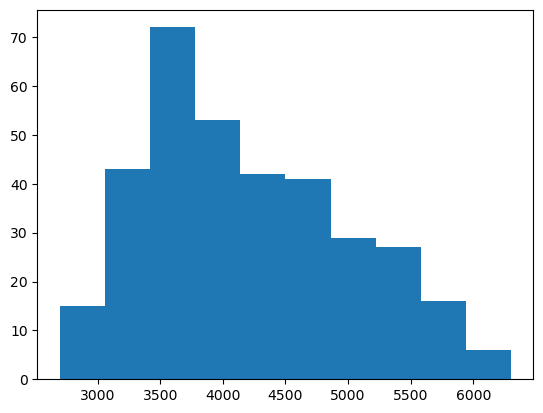

In [23]:
plt.hist(pima['body_mass_g'])

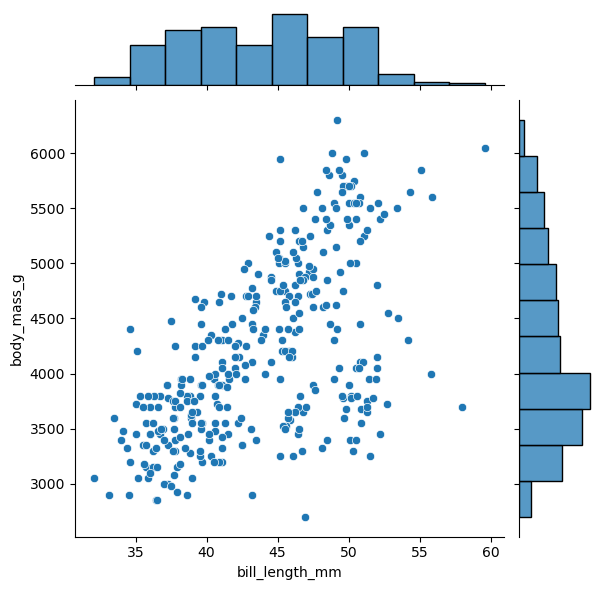

In [24]:
sb.jointplot(x='bill_length_mm', y='body_mass_g', data=pima)

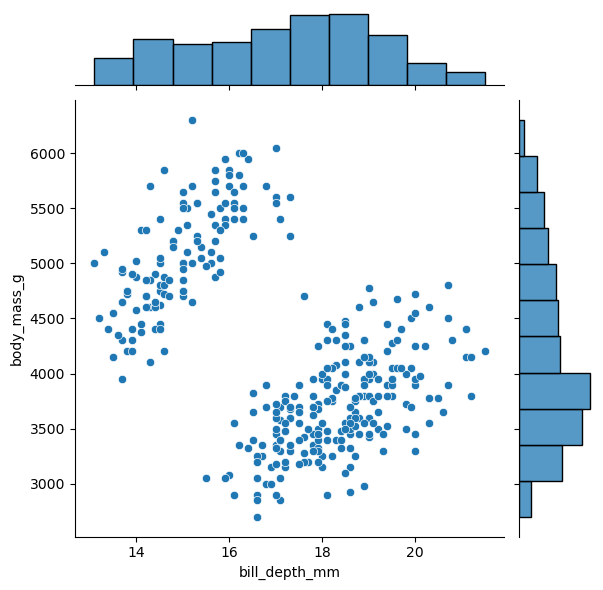

In [25]:
sb.jointplot(x='bill_depth_mm', y='body_mass_g', data=pima)

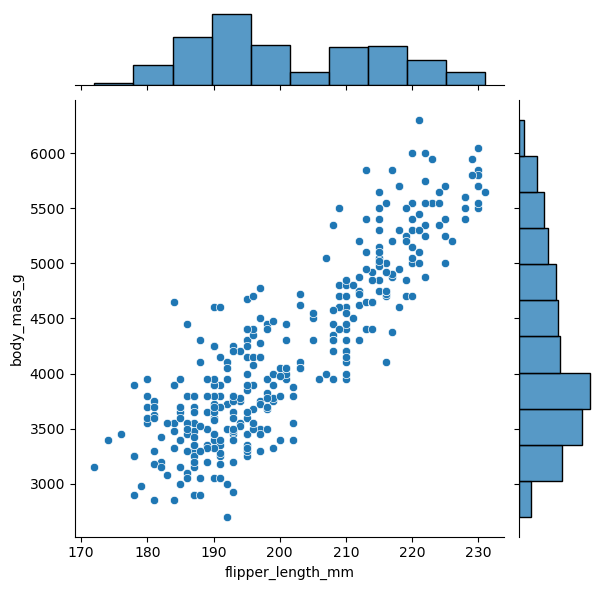

In [26]:
sb.jointplot(x='flipper_length_mm', y='body_mass_g', data=pima)

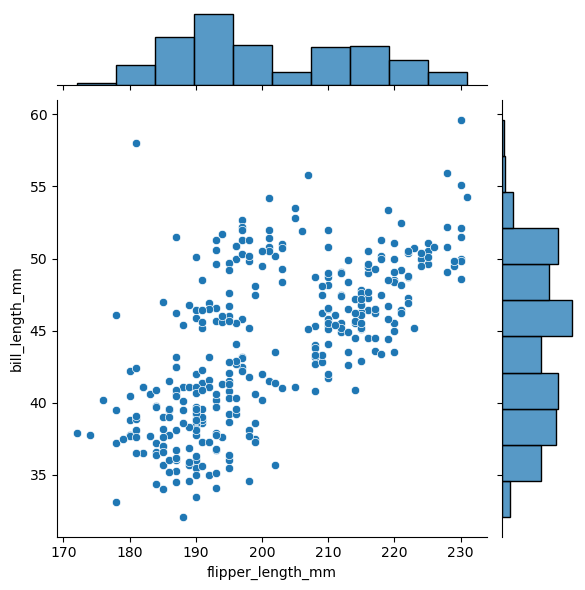

In [27]:
sb.jointplot(x='flipper_length_mm', y='bill_length_mm', data=pima)

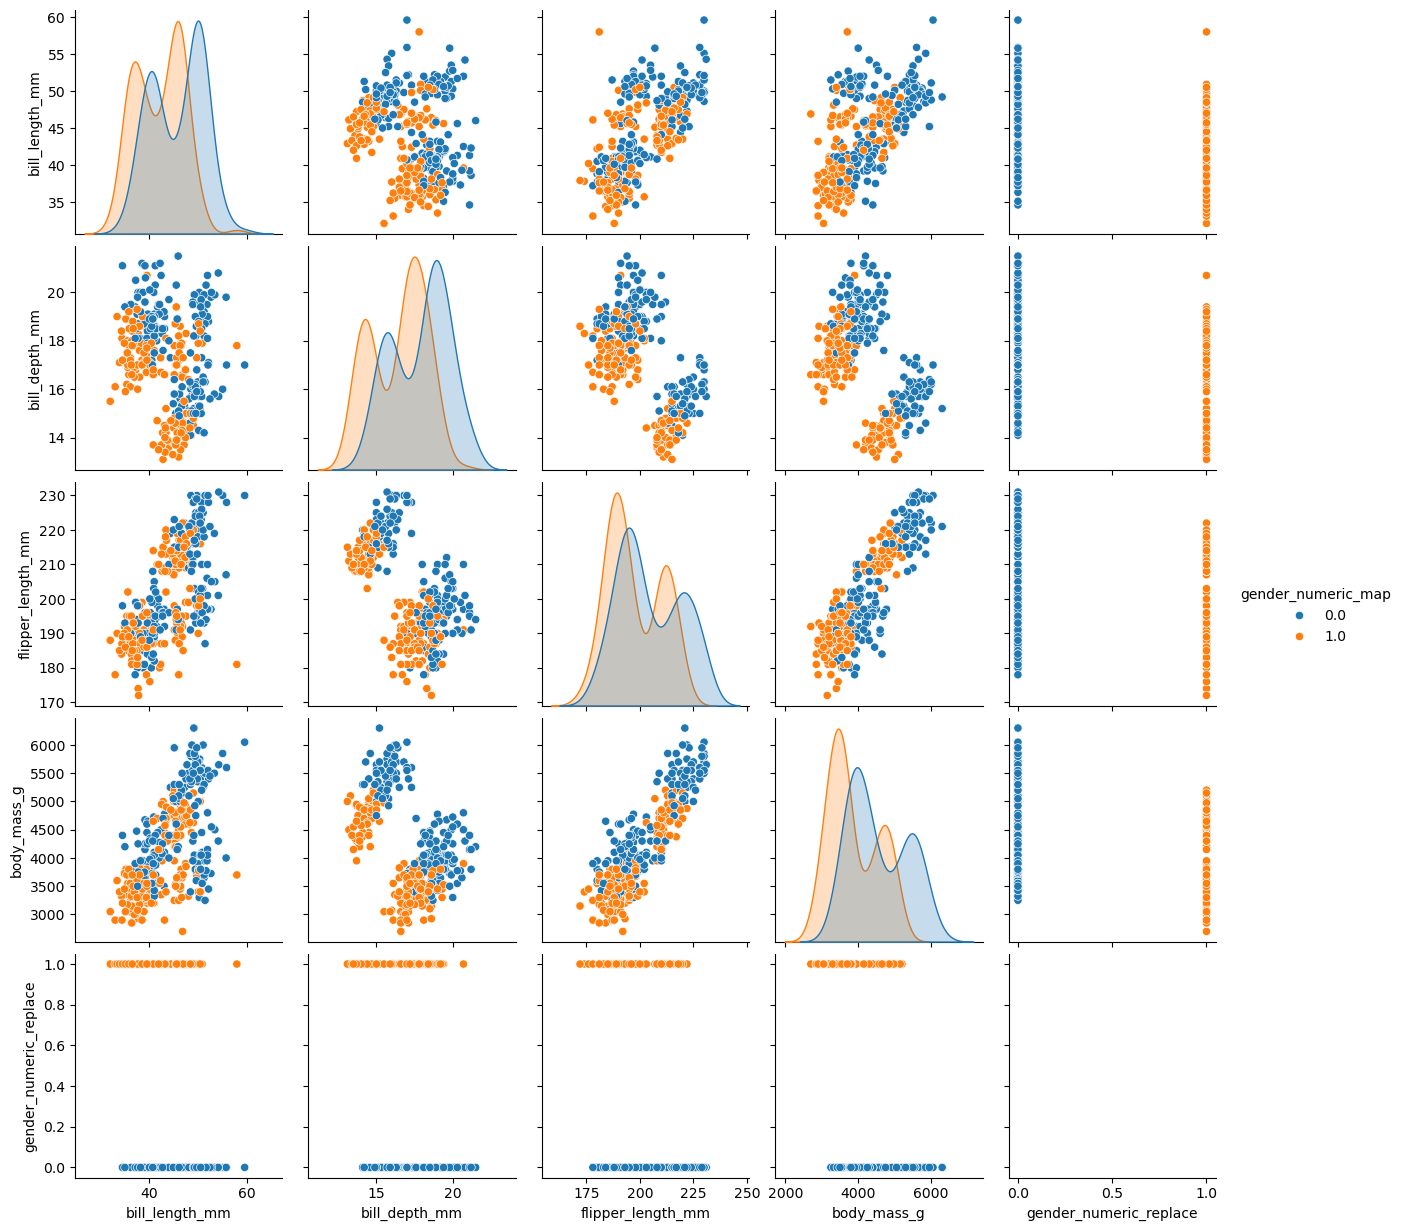

In [28]:
#Crate a pairplot with the hue defined by the ‘gender_numeric_map’ column feature
sb.pairplot(data=pima, hue='gender_numeric_map')

In [29]:
#Choose columns that you want to use for Logistic Regression
x = pima[['bill_length_mm', 'bill_depth_mm','flipper_length_mm']]
y = pima[['gender_numeric_map']]

In [30]:
# Combine X and y into one DataFrame so rows stay aligned
pima= pd.concat([x, y], axis=1)
# drop NaNs in y
pima = pima.dropna(subset=['gender_numeric_map'])
# Separate into X and y
x = pima.drop('gender_numeric_map', axis=1)
y = pima['gender_numeric_map']  # This will be a Series
# Train-test split Split the data into training set and testing set so that your testing set consists 25% of total data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)
# Convert y_train to 1D array for sklearn
y_train = y_train.to_numpy().ravel()


In [31]:
#Train and fit a Logistic Regression model on the training set
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(x_train, y_train)

LogisticRegression()

In [32]:
#Display all the coefficients values of the fitted Logistic Regression Model
logic.coef_

array([[-0.10624333, -1.36667006, -0.14503498]])

In [33]:
#Predict class label for the testing dataset
predict = logic.predict(x_test)
predict

array([1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])

In [34]:
#Create a classification report for the model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77        37
         1.0       0.83      0.81      0.82        47

    accuracy                           0.80        84
   macro avg       0.79      0.80      0.80        84
weighted avg       0.80      0.80      0.80        84



In [35]:
#Create the confusion matrix for your fitted model and calculate the model accuracy
print(confusion_matrix(y_test,predict))

[[29  8]
 [ 9 38]]
